## Setup

Import modules

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

from scipy.stats import pearsonr

Define date constants

In [64]:
START_DATE = '2010-01'
END_DATE = '2022-12'

Import dataset

In [65]:
MEAT_PRODUCTION_DATASET = '../udataset/meat/production.csv'
meat_df = pd.read_csv(MEAT_PRODUCTION_DATASET)#
meat_df = meat_df.rename(columns={'DateTime': 'YearMonth'})
meat_df

,YearMonth,Beef,Veal,Pork,Lamb and Mutton,Broiler,Other Chicken,Turkey,Red Meat,Poultry
0,2001-01,2.172000e+09,17000000.0,1.672000e+09,18000000.0,2.622200e+09,42700000.0,403400000.0,3.879000e+09,3.068300e+09
1,2001-02,1.852000e+09,15000000.0,1.467000e+09,17000000.0,2.322200e+09,39700000.0,461200000.0,3.351000e+09,2.823100e+09
2,2001-03,2.065000e+09,16000000.0,1.606000e+09,23000000.0,2.588600e+09,44400000.0,409300000.0,3.710000e+09,3.042300e+09
3,2001-04,1.910000e+09,15000000.0,1.514000e+09,19000000.0,2.515700e+09,42200000.0,462000000.0,3.458000e+09,3.019900e+09
4,2001-05,2.265000e+09,15000000.0,1.535000e+09,16000000.0,2.835600e+09,45600000.0,428800000.0,3.831000e+09,3.310000e+09
...,...,...,...,...,...,...,...,...,...,...
271,2023-08,2.329500e+09,4100000.0,2.282400e+09,8900000.0,4.156700e+09,51100000.0,433500000.0,4.624900e+09,4.641300e+09
272,2023-09,2.114600e+09,3500000.0,2.175500e+09,8600000.0,3.805500e+09,48400000.0,489200000.0,4.302200e+09,4.343100e+09
273,2023-10,2.300800e+09,4000000.0,2.406200e+09,9800000.0,4.177300e+09,50600000.0,431200000.0,4.720800e+09,4.659100e+09
274,2023-11,2.247300e+09,4100000.0,2.377400e+09,10100000.0,3.817300e+09,44500000.0,500300000.0,4.638900e+09,4.362100e+09


In [66]:
UNEMPLOYMENT_DATASET = '../udataset/unemployment_by_state.csv'
NATIONAL_UNEMPLOYMENT = '../udataset/unemployment_month_US.csv'
unemployment_df = pd.read_csv(UNEMPLOYMENT_DATASET)
national_unemployment_df = pd.read_csv(NATIONAL_UNEMPLOYMENT)
unemployment_df
national_unemployment_df = national_unemployment_df.drop(columns=['Unnamed: 0'])
national_unemployment_df = national_unemployment_df.rename(columns={'Year-Month': 'YearMonth', 'unemployment_rate': 'national-unemployment-rate'})
national_unemployment_df

,YearMonth,national-unemployment-rate
0,2010-01,9.8
1,2010-02,9.8
2,2010-03,9.9
3,2010-04,9.9
4,2010-05,9.6
...,...,...
151,2022-08,3.6
152,2022-09,3.5
153,2022-10,3.6
154,2022-11,3.6


In [67]:
HOURLY_EARNINGS='../udataset/hourly_earnings.csv'
earnings_df = pd.read_csv(HOURLY_EARNINGS)
earnings_df = earnings_df.rename(columns = {'YearMonth': 'date', 'State': 'state'})
#poverty_df['date'] = poverty_df['date'].str.slice(0, 7)
NATIONAL_HOURLY_EARNINGS='../dataset/national_hourly_earnings.csv'
national_earnings_df = pd.read_csv(NATIONAL_HOURLY_EARNINGS)
national_earnings_df = national_earnings_df.rename(columns = {'HourlyEarnings': 'national-hourly-earnings'})
national_earnings_df

,YearMonth,national-hourly-earnings
0,2006-03,20.07
1,2006-04,20.36
2,2006-05,20.06
3,2006-06,20.04
4,2006-07,20.28
...,...,...
212,2023-11,34.08
213,2023-12,34.26
214,2024-01,34.67
215,2024-02,34.61


In [68]:
unemployment_df = pd.merge(unemployment_df, earnings_df,
                           left_on=['YearMonth', 'State'],
                           right_on=['date', 'state'])

unemployment_df = unemployment_df[['State', 'YearMonth', 'UnemploymentRate', 'HourlyEarnings']]
unemployment_df

,State,YearMonth,UnemploymentRate,HourlyEarnings
0,alabama,2010-01,11.7,19.94
1,alabama,2010-02,11.4,19.94
2,alabama,2010-03,11.0,19.95
3,alabama,2010-04,10.1,19.93
4,alabama,2010-05,9.9,19.90
...,...,...,...,...
8665,wyoming,2023-10,2.4,30.35
8666,wyoming,2023-11,2.7,30.54
8667,wyoming,2023-12,2.6,30.84
8668,wyoming,2024-01,3.7,30.91


In [69]:
# Pivot the table for each metric and merge them into a single dataframe with YearMonth as the index
unemployment_pivot = unemployment_df.pivot(
    index='YearMonth',
    columns='State',
    values='UnemploymentRate'
)
earning_pivot = unemployment_df.pivot(
    index='YearMonth',
    columns='State',
    values='HourlyEarnings'
)

In [70]:
# Rename the columns
unemployment_pivot.columns = [f"{col.lower()}-unemployment-rate" for col in unemployment_pivot.columns]
earning_pivot.columns = [f"{col.lower()}-hourly-earnings" for col in earning_pivot.columns]

In [71]:
merged_df = pd.merge(unemployment_pivot, earning_pivot, left_index=True, right_index=True, how='outer')
merged_df = merged_df.sort_index(axis=1)

In [72]:
meat_df = pd.merge(meat_df, merged_df, on='YearMonth', how='right')
meat_df = pd.merge(meat_df, national_earnings_df, on = 'YearMonth')
meat_df = pd.merge(meat_df, national_unemployment_df, on = 'YearMonth')
meat_df

,YearMonth,Beef,Veal,Pork,Lamb and Mutton,Broiler,Other Chicken,Turkey,Red Meat,Poultry,...,washington-hourly-earnings,washington-unemployment-rate,west virginia-hourly-earnings,west virginia-unemployment-rate,wisconsin-hourly-earnings,wisconsin-unemployment-rate,wyoming-hourly-earnings,wyoming-unemployment-rate,national-hourly-earnings,national-unemployment-rate
0,2010-01,2.051100e+09,11300000.0,1.797800e+09,12200000.0,2.831200e+09,37800000.0,456300000.0,3.872400e+09,3.325300e+09,...,26.64,10.2,18.49,9.8,21.37,10.1,21.47,8.7,22.51,9.8
1,2010-02,1.927200e+09,10500000.0,1.745000e+09,11900000.0,2.739500e+09,34700000.0,424200000.0,3.694600e+09,3.198400e+09,...,26.81,10.1,18.70,10.4,21.40,10.4,21.39,8.3,22.57,9.8
2,2010-03,2.180700e+09,11900000.0,2.025100e+09,17000000.0,3.162000e+09,43400000.0,425400000.0,4.234700e+09,3.630800e+09,...,26.86,9.8,18.56,9.6,21.26,10.1,21.42,8.1,22.48,9.9
3,2010-04,2.110800e+09,10800000.0,1.835900e+09,12300000.0,3.038300e+09,40700000.0,490000000.0,3.969800e+09,3.569000e+09,...,26.81,8.9,18.59,8.5,21.38,8.8,21.66,7.4,22.53,9.9
4,2010-05,2.060700e+09,9800000.0,1.608700e+09,11800000.0,3.020000e+09,40200000.0,455100000.0,3.691000e+09,3.515300e+09,...,26.81,8.9,18.78,8.2,21.39,8.3,21.65,7.0,22.60,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08,2.466900e+09,4500000.0,2.291100e+09,10300000.0,4.211000e+09,55300000.0,393900000.0,4.772800e+09,4.660200e+09,...,37.86,4.4,26.82,4.3,29.83,3.0,28.65,3.2,32.25,3.6
152,2022-09,2.350600e+09,4200000.0,2.247700e+09,9600000.0,4.000500e+09,50700000.0,449200000.0,4.612100e+09,4.500400e+09,...,37.85,3.9,27.04,3.3,30.34,2.5,28.89,2.9,32.49,3.5
153,2022-10,2.363100e+09,4400000.0,2.326400e+09,9000000.0,4.068500e+09,48200000.0,420600000.0,4.702900e+09,4.537300e+09,...,38.59,4.0,27.39,3.3,30.57,2.3,28.92,3.0,32.87,3.6
154,2022-11,2.387600e+09,4400000.0,2.340700e+09,10000000.0,3.940900e+09,45400000.0,467300000.0,4.742700e+09,4.453600e+09,...,38.45,4.2,27.28,3.4,30.59,2.3,28.62,3.3,32.71,3.6


/tmp/ipykernel_41220/931448834.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_df['YearMonth'] = pd.to_datetime(meat_df['YearMonth'])
/tmp/ipykernel_41220/931448834.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_df['YearMonth'] = meat_df['YearMonth'].dt.to_period('M')


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

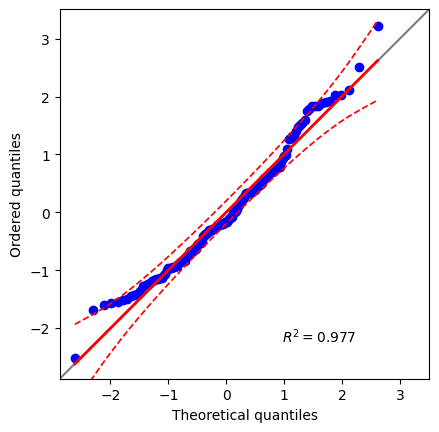

In [73]:
# #unemployment_rate = [9.63, 8.95, 8.07, 7.37, 6.17, 5.28, 4.87, 4.36, 3.90, 3.67, 8.05, 5.35, 3.61]
# for state in unemployment_df['state'].unique():
#     temp_df = unemployment_df[unemployment_df['state'] == state].copy()
#     #temp_df['unemployment-rate'] = temp_df['below_poverty_line_percent']/temp_df['unemployment-rate']
#     temp_df = temp_df.rename(columns={'unemployment-rate': f'{state}-unemployment-rate', 'below_poverty_line_percent': f"{state}-poverty-percent"})
#     temp_df = temp_df.drop(columns=['state'])

#     print(temp_df.columns)
#     meat_df = pd.merge(meat_df, temp_df, on=['year-month'])

#meat_df = meat_df[meat_df['year-month'].str.match(r'*-12')]
# #print(new_df['unemployment_rate'].expanding().corr(new_df['S&P_growth']))
for col in meat_df.columns[1:]:
    meat_df[col] = meat_df[col].pct_change()

meat_df = meat_df.dropna()
#to_plot = meat_df['national-hourly-earnings']
meat_df
meat_df['YearMonth'] = pd.to_datetime(meat_df['YearMonth'])
meat_df['YearMonth'] = meat_df['YearMonth'].dt.to_period('M')
#to_plot = meat_df[(meat_df['national-unemployment-rate'] < 0.5) & (meat_df['YearMonth'] < pd.Period('2020-01'))]['national-unemployment-rate']
to_plot = meat_df['Pork']
to_plot =(to_plot-to_plot.mean())/to_plot.std()
#plt.hist(to_plot, bins=45)
pg.qqplot(to_plot, dist='norm', confidence=.95)


In [74]:
meat_df

,YearMonth,Beef,Veal,Pork,Lamb and Mutton,Broiler,Other Chicken,Turkey,Red Meat,Poultry,...,washington-hourly-earnings,washington-unemployment-rate,west virginia-hourly-earnings,west virginia-unemployment-rate,wisconsin-hourly-earnings,wisconsin-unemployment-rate,wyoming-hourly-earnings,wyoming-unemployment-rate,national-hourly-earnings,national-unemployment-rate
1,2010-02,-0.060407,-0.070796,-0.029369,-0.024590,-0.032389,-0.082011,-0.070348,-0.045915,-0.038162,...,0.006381,-0.009804,0.011357,0.061224,0.001404,0.029703,-0.003726,-0.045977,0.002665,0.000000
2,2010-03,0.131538,0.133333,0.160516,0.428571,0.154225,0.250720,0.002829,0.146186,0.135193,...,0.001865,-0.029703,-0.007487,-0.076923,-0.006542,-0.028846,0.001403,-0.024096,-0.003988,0.010204
3,2010-04,-0.032054,-0.092437,-0.093427,-0.276471,-0.039121,-0.062212,0.151857,-0.062555,-0.017021,...,-0.001862,-0.091837,0.001616,-0.114583,0.005644,-0.128713,0.011204,-0.086420,0.002224,0.000000
4,2010-05,-0.023735,-0.092593,-0.123754,-0.040650,-0.006023,-0.012285,-0.071224,-0.070230,-0.015046,...,0.000000,0.000000,0.010221,-0.035294,0.000468,-0.056818,-0.000462,-0.054054,0.003107,-0.030303
5,2010-06,0.111661,0.061224,0.130540,0.127119,0.039636,0.087065,-0.035816,0.119805,0.030410,...,-0.002984,-0.011236,-0.001065,0.024390,-0.015428,0.024096,-0.026328,-0.057143,-0.011504,-0.020833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022-08,0.114026,0.125000,0.168630,0.157303,0.142803,0.210066,-0.109428,0.139691,0.116804,...,0.006915,0.128205,0.007892,0.048780,0.000671,-0.032258,0.001748,0.032258,0.001553,0.028571
152,2022-09,-0.047144,-0.066667,-0.018943,-0.067961,-0.049988,-0.083183,0.140391,-0.033670,-0.034290,...,-0.000264,-0.113636,0.008203,-0.232558,0.017097,-0.166667,0.008377,-0.093750,0.007442,-0.027778
153,2022-10,0.005318,0.047619,0.035014,-0.062500,0.016998,-0.049310,-0.063669,0.019687,0.008199,...,0.019551,0.025641,0.012944,0.000000,0.007581,-0.080000,0.001038,0.034483,0.011696,0.028571
154,2022-11,0.010368,0.000000,0.006147,0.111111,-0.031363,-0.058091,0.111032,0.008463,-0.018447,...,-0.003628,0.050000,-0.004016,0.030303,0.000654,0.000000,-0.010373,0.100000,-0.004868,0.000000


In [75]:
meat_df[meat_df.columns[1:]].corr().to_csv('../udataset/state_pearson_correlation.csv')
meat_df[meat_df.columns[1:]].corr(method = 'spearman').to_csv('../udataset/state_spearman_correlation.csv')
# meat_df['expanding_correlation'] = meat_df['delaware-poverty-percent'].expanding().corr(meat_df['Beef'])
# #meat_df['expanding_correlation'].to_csv('../udataset/state-correlation.csv')

# plt.figure(figsize=(10, 5))
# plt.plot(meat_df['year-month'], meat_df['expanding_correlation'], label='Cali')
# plt.xlabel('Year')
# plt.ylabel('Below Poverty Line (%)')
# plt.legend()
# plt.grid(True)
# plt.show()
#x = meat_df['expanding_correlation']
# plt.plot()

In [76]:
meat_df.to_csv('../udataset/meat_earnings_data.csv')

In [77]:
# Create an empty DataFrame to store the p-values
p_values = pd.DataFrame(index=meat_df.columns[1:], columns=meat_df.columns[1:])

In [78]:
for col1 in meat_df.columns[1:]:
    for col2 in meat_df.columns[1:]:
        if col1 == col2:
            p_values.at[col1, col2] = np.NaN  # No need to calculate p-value for itself
        else:
            _, p_value = pearsonr(meat_df[col1], meat_df[col2])
            p_values.at[col1, col2] = p_value

In [79]:
p_values.to_csv('../udataset/p_values_earnings_state.csv')